## Importing Trained Model

In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#https://drive.google.com/file/d/1eaLAU7Hul-TVxgpOE-aj9rYQgC-gh4xc/view?usp=sharing
file_id_1 = '1eaLAU7Hul-TVxgpOE-aj9rYQgC-gh4xc'
downloaded = drive.CreateFile({'id': file_id_1})
downloaded.GetContentFile('vgg16.h5')

In [2]:
import tensorflow as tf
from tensorflow import keras
vgg16_model = keras.models.load_model('/content/vgg16.h5')

## Importing Dataset to test on 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:04<00:00, 40.8MB/s]
100% 163M/163M [00:04<00:00, 36.1MB/s]


In [8]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [9]:
import os
import random 
from glob import glob
from pathlib import Path
TEST_DIR = os.path.join("/content", "data")

all_data = [y for x in os.walk(TEST_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
all_labels = [os.path.basename(os.path.dirname(x)) for x in all_data]
print(len(all_data))
all_data[:10]


7553


['/content/data/without_mask/without_mask_3271.jpg',
 '/content/data/without_mask/without_mask_231.jpg',
 '/content/data/without_mask/without_mask_3273.jpg',
 '/content/data/without_mask/without_mask_2777.jpg',
 '/content/data/without_mask/without_mask_193.jpg',
 '/content/data/without_mask/without_mask_1238.jpg',
 '/content/data/without_mask/without_mask_2982.jpg',
 '/content/data/without_mask/without_mask_1428.jpg',
 '/content/data/without_mask/without_mask_1250.jpg',
 '/content/data/without_mask/without_mask_497.jpg']

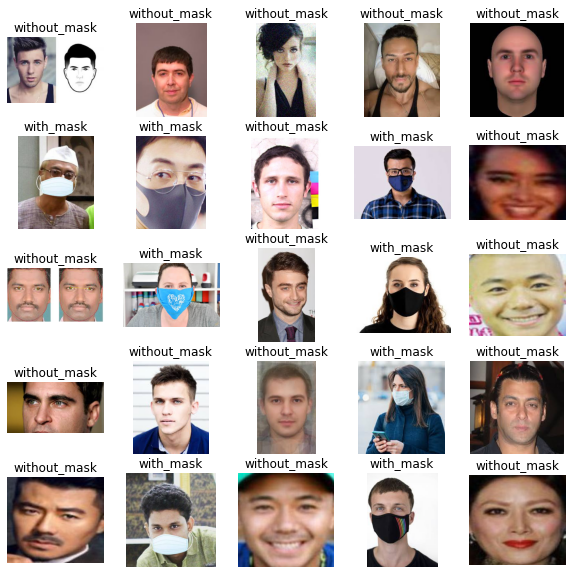

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_data), size=25)
images = [all_data[i] for i in indices]
labels = [all_labels[i] for i in indices]

# Plot the 25 images
plt.figure(figsize=(10,10))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')
    
plt.show()

In [13]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 500
HEIGHT = 128
WIDTH = 128
test_datagen =  ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(HEIGHT, WIDTH),
                                                  batch_size=BATCH_SIZE,
                                                  shuffle = False,
                                                  color_mode='rgb')

Found 7553 images belonging to 2 classes.


## Testing The Model

In [15]:
vgg16_model.evaluate(test_generator, batch_size=500, steps=7)

4/7 [================>.............] - ETA: 4s - loss: 1.4166 - accuracy: 0.9800

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7/7 [==============================] - 18s 3s/step - loss: 1.4366 - accuracy: 0.9780


[1.4366110563278198, 0.9779999852180481]